In [ ]:
import tensorflow as tf
from sklearn.metrics import confusion_matrix, classification_report

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Input, Conv2D, Dense, Flatten, Dropout
from tensorflow.keras.layers import GlobalMaxPooling2D, MaxPooling2D
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.models import Sequential
from tensorflow import keras

In [5]:
cifar10 = tf.keras.datasets.cifar10
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
print(x_train.shape, y_train.shape, x_test.shape, y_test.shape)

(50000, 32, 32, 3) (50000, 1) (10000, 32, 32, 3) (10000, 1)


In [6]:
# Reduce pixel values
x_train, x_test = x_train / 255.0, x_test / 255.0

In [7]:
y_train = keras.utils.to_categorical(y_train, 10)
y_test = keras.utils.to_categorical(y_test, 10)

In [8]:
print(y_train)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 1.]
 [0. 0. 0. ... 0. 0. 1.]
 ...
 [0. 0. 0. ... 0. 0. 1.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]]


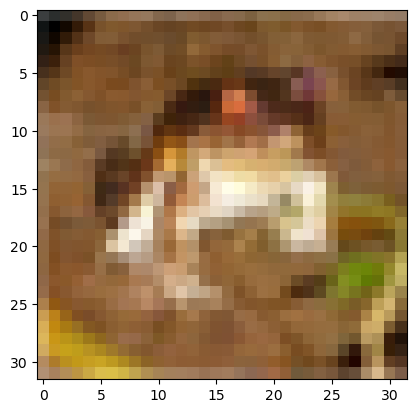

In [9]:
plt.imshow(x_train[0])

In [10]:
model = Sequential(
    (
        Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
        BatchNormalization(),
        MaxPooling2D((2, 2)),
        Conv2D(64, (3, 3), activation='relu'),
        BatchNormalization(),
        MaxPooling2D((2, 2)),
        Conv2D(128, (3, 3), activation='relu'),
        BatchNormalization(),
        MaxPooling2D((2, 2)),
        Flatten(),
        Dense(1024, activation='relu'),
        Dense(10, activation='softmax')
    )
)

In [11]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 32)        896       
                                                                 
 batch_normalization (BatchN  (None, 30, 30, 32)       128       
 ormalization)                                                   
                                                                 
 max_pooling2d (MaxPooling2D  (None, 15, 15, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 batch_normalization_1 (Batc  (None, 13, 13, 64)       256       
 hNormalization)                                                 
                                                        

In [12]:
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [13]:
with tf.device('/device:GPU:0'):
    history = model.fit(x_train, y_train, validation_data=(x_test, y_test), batch_size=32, epochs=20, shuffle=True)

Epoch 1/20
1563/1563 [==============================] - 17s 8ms/step - loss: 1.2337 - accuracy: 0.5667 - val_loss: 1.1890 - val_accuracy: 0.5853
Epoch 2/20
1563/1563 [==============================] - 13s 8ms/step - loss: 0.8694 - accuracy: 0.6952 - val_loss: 0.9583 - val_accuracy: 0.6745
Epoch 3/20
1563/1563 [==============================] - 13s 8ms/step - loss: 0.7068 - accuracy: 0.7544 - val_loss: 0.9694 - val_accuracy: 0.6627
Epoch 4/20
1563/1563 [==============================] - 13s 8ms/step - loss: 0.5786 - accuracy: 0.7983 - val_loss: 1.0205 - val_accuracy: 0.6853
Epoch 5/20
1563/1563 [==============================] - 13s 8ms/step - loss: 0.4733 - accuracy: 0.8344 - val_loss: 0.9673 - val_accuracy: 0.7145
Epoch 6/20
1563/1563 [==============================] - 13s 8ms/step - loss: 0.3686 - accuracy: 0.8708 - val_loss: 0.9666 - val_accuracy: 0.7154
Epoch 7/20
1563/1563 [==============================] - 13s 8ms/step - loss: 0.2934 - accuracy: 0.8976 - val_loss: 1.1554 - val_ac

In [14]:
scores = model.evaluate(x_test, y_test, verbose=1)
print('Test loss:', scores[0])
print('Test accuracy:', scores[1])

313/313 [==============================] - 1s 5ms/step - loss: 1.7326 - accuracy: 0.7172
Test loss: 1.7326329946517944
Test accuracy: 0.717199981212616


In [15]:
pred = model.predict(x_test)

313/313 [==============================] - 1s 3ms/step


In [16]:
def heatmap(data, row_labels, col_labels, ax=None, cbar_kw={}, cbarlabel="", **kwargs):
    """
    Create a heatmap from a numpy array and two lists of labels.
    """
    if not ax:
        ax = plt.gca()

    # Plot the heatmap
    im = ax.imshow(data, **kwargs)

    # Create colorbar
    cbar = ax.figure.colorbar(im, ax=ax, **cbar_kw)
    cbar.ax.set_ylabel(cbarlabel, rotation=-90, va="bottom")

    # Let the horizontal axes labeling appear on top.
    ax.tick_params(top=True, bottom=False,
                   labeltop=True, labelbottom=False)
    # We want to show all ticks...
    ax.set_xticks(np.arange(data.shape[1]))
    ax.set_yticks(np.arange(data.shape[0]))
    # ... and label them with the respective list entries.
    ax.set_xticklabels(col_labels)
    ax.set_yticklabels(row_labels)
    
    ax.set_xlabel('Predicted Label') 
    ax.set_ylabel('True Label')
    
    return im, cbar

def annotate_heatmap(im, data=None, fmt="d", threshold=None):
    """
    A function to annotate a heatmap.
    """
    # Change the text's color depending on the data.
    texts = []
    for i in range(data.shape[0]):
        for j in range(data.shape[1]):
            text = im.axes.text(j, i, format(data[i, j], fmt), horizontalalignment="center",
                                 color="white" if data[i, j] > thresh else "black")
            texts.append(text)

    return texts

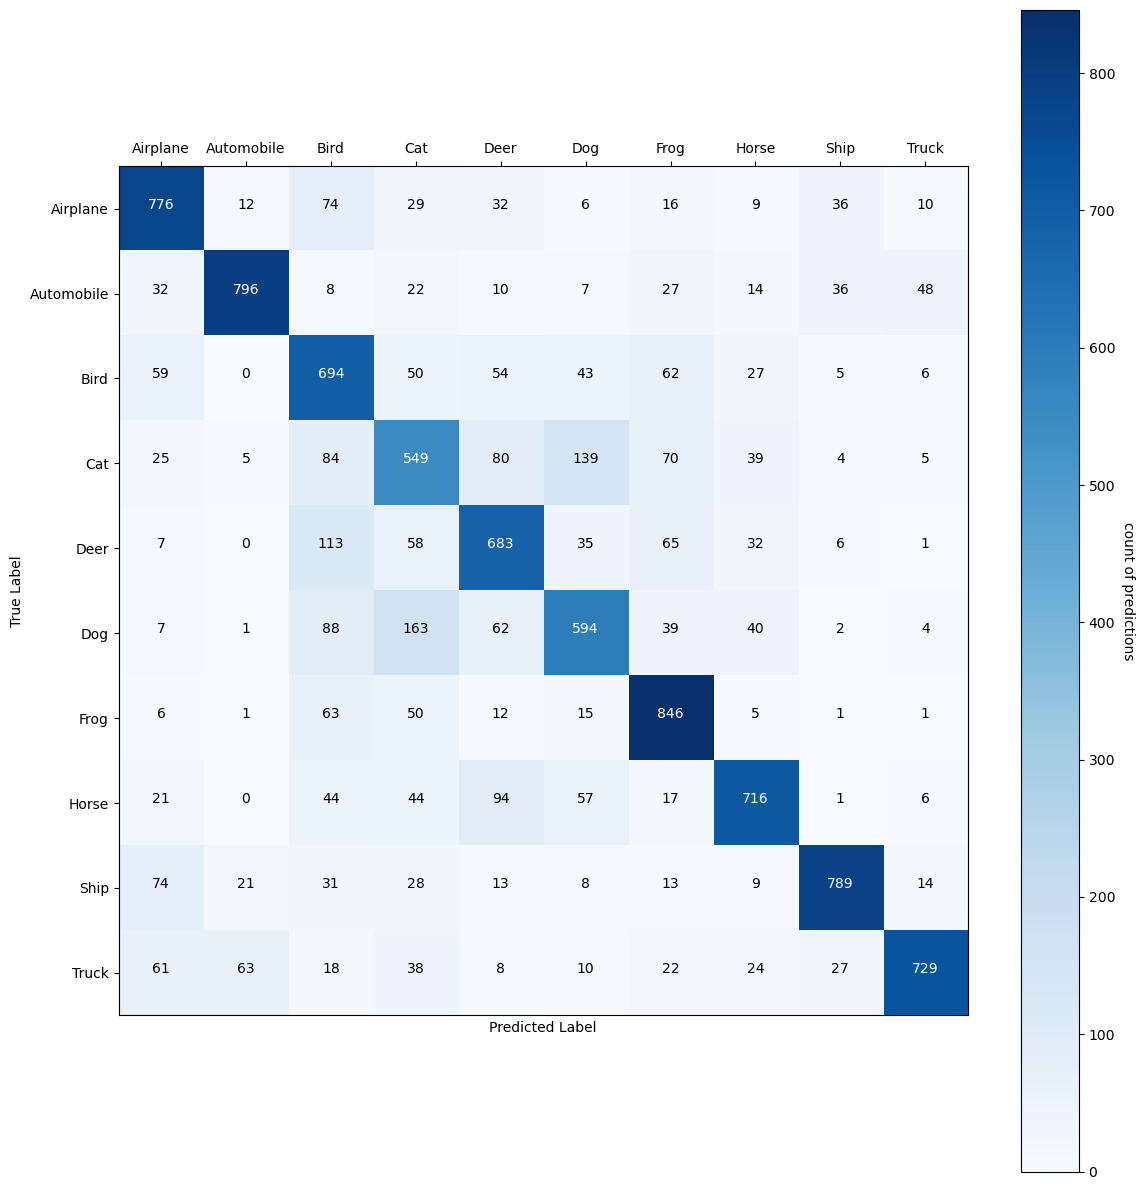

In [17]:
labels = ['Airplane', 'Automobile', 'Bird', 'Cat', 'Deer', 'Dog', 'Frog', 'Horse', 'Ship', 'Truck']

# Convert predictions classes to one hot vectors 
Y_pred_classes = np.argmax(pred, axis=1) 
# Convert validation observations to one hot vectors
Y_true = np.argmax(y_test, axis=1)
# Errors are difference between predicted labels and true labels
errors = (Y_pred_classes - Y_true != 0)

Y_pred_classes_errors = Y_pred_classes[errors]
Y_pred_errors = pred[errors]
Y_true_errors = Y_true[errors]
X_test_errors = x_test[errors]

cm = confusion_matrix(Y_true, Y_pred_classes) 
thresh = cm.max() / 2.

fig, ax = plt.subplots(figsize=(12,12))
im, cbar = heatmap(cm, labels, labels, ax=ax,
                   cmap=plt.cm.Blues, cbarlabel="count of predictions")
texts = annotate_heatmap(im, data=cm, threshold=thresh)

fig.tight_layout()
plt.show()

In [18]:
print(classification_report(Y_true, Y_pred_classes))

              precision    recall  f1-score   support

           0       0.73      0.78      0.75      1000
           1       0.89      0.80      0.84      1000
           2       0.57      0.69      0.63      1000
           3       0.53      0.55      0.54      1000
           4       0.65      0.68      0.67      1000
           5       0.65      0.59      0.62      1000
           6       0.72      0.85      0.78      1000
           7       0.78      0.72      0.75      1000
           8       0.87      0.79      0.83      1000
           9       0.88      0.73      0.80      1000

    accuracy                           0.72     10000
   macro avg       0.73      0.72      0.72     10000
weighted avg       0.73      0.72      0.72     10000



In [27]:
# Save the entire model in TensorFlow SavedModel format
model.save('./cifar10_base')

INFO:tensorflow:Assets written to: ./cifar10_base\assets


INFO:tensorflow:Assets written to: ./cifar10_base\assets
